This module will focus purely on hidden layer unit.

We will start with ReLU.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

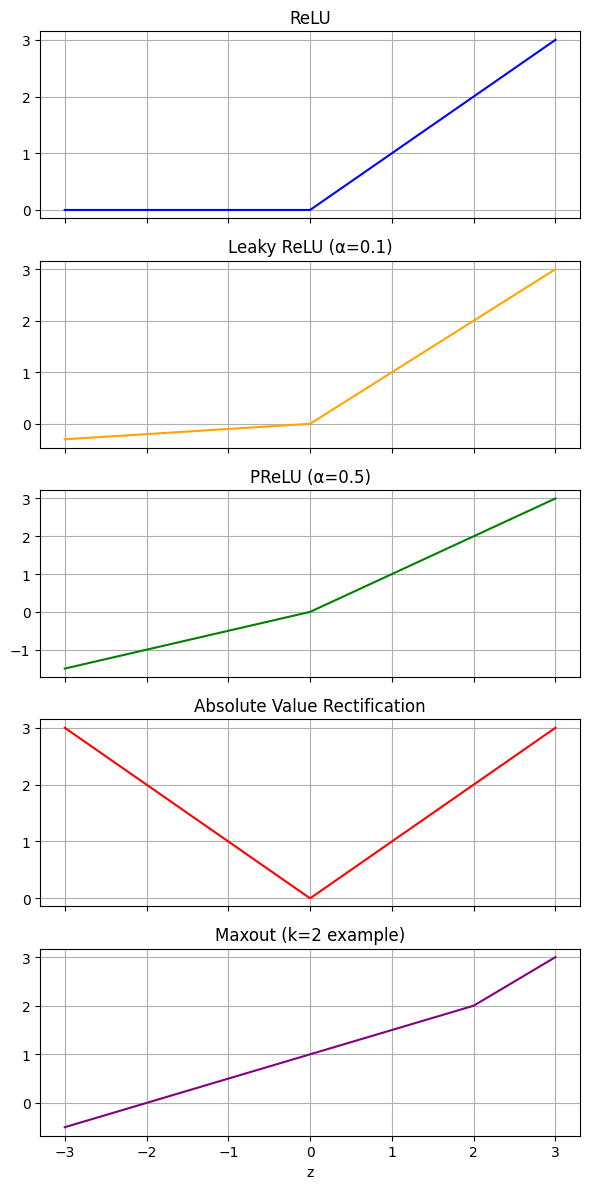

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def relu(z):
    return np.maximum(0, z)

def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

def prelu(z, alpha):
    return np.where(z > 0, z, alpha * z)

def abs_rect(z):
    return np.abs(z)

# Example for maxout: here we just take max of two linear functions
def maxout_example(z):
    z1 = z
    z2 = 0.5 * z + 1
    return np.maximum(z1, z2)

# Input range
z = np.linspace(-3, 3, 400)

# Prepare subplots
fig, axes = plt.subplots(5, 1, figsize=(6, 12), sharex=True)

# Plot each activation separately
axes[0].plot(z, relu(z), color='blue')
axes[0].set_title("ReLU")
axes[0].grid(True)

axes[1].plot(z, leaky_relu(z, alpha=0.1), color='orange')
axes[1].set_title("Leaky ReLU (α=0.1)")
axes[1].grid(True)

axes[2].plot(z, prelu(z, alpha=0.5), color='green')
axes[2].set_title("PReLU (α=0.5)")
axes[2].grid(True)

axes[3].plot(z, abs_rect(z), color='red')
axes[3].set_title("Absolute Value Rectification")
axes[3].grid(True)

axes[4].plot(z, maxout_example(z), color='purple')
axes[4].set_title("Maxout (k=2 example)")
axes[4].grid(True)

# Label the shared x-axis
plt.xlabel("z")
plt.tight_layout()
plt.show()


Now we will work on sigmoid and tanh.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

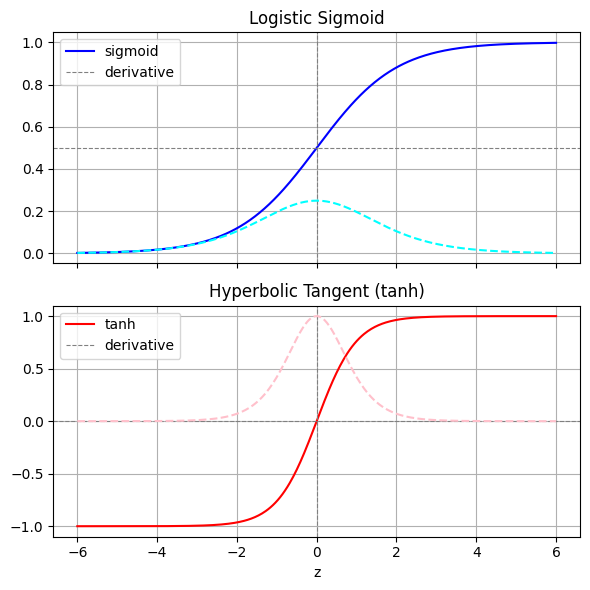

In [7]:
# Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def tanh(z):
    return np.tanh(z)
def deriv_sigmoid(z):
    s = sigmoid(z)
    return s * (1 - s)
def deriv_tanh(z):
    t = tanh(z)
    return 1 - t**2

#Input range
z = np.linspace(-6, 6, 400)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

# Sigmoid
axes[0].plot(z, sigmoid(z), color='blue')
axes[0].set_title("Logistic Sigmoid")
axes[0].axhline(0.5, color='gray', linestyle='--', linewidth=0.8)
axes[0].axvline(0, color='gray', linestyle='--', linewidth=0.8)
axes[0].grid(True)
#Also plot derivative
axes[0].plot(z, deriv_sigmoid(z), color='cyan', linestyle='--')
axes[0].legend(['sigmoid', 'derivative']) 
# Tanh
axes[1].plot(z, tanh(z), color='red')
axes[1].set_title("Hyperbolic Tangent (tanh)")
axes[1].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axes[1].axvline(0, color='gray', linestyle='--', linewidth=0.8)
axes[1].grid(True)
#Also plot derivative
axes[1].plot(z, deriv_tanh(z), color='pink', linestyle='--')
axes[1].legend(['tanh', 'derivative'])

plt.xlabel("z")
plt.tight_layout()
plt.show()

For tanh, the tanh derivative near 0 (1) is even higher than the sigmoid function (0.25), so tanh will be more senstive if z is near 0. But tanh balance positive and negative activations, so it can help optimization.

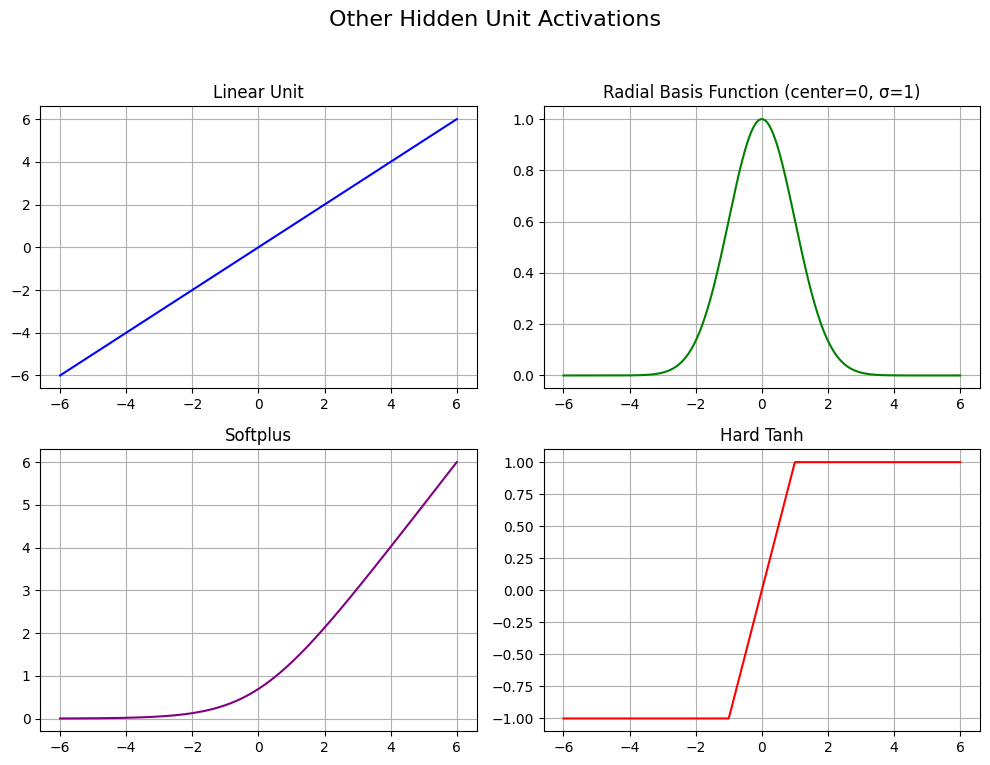

In [9]:
# Other hidden unit functions
def linear(z):
    return z

def rbf_unit(z, c=0, s=1):
    return np.exp(-((z - c) ** 2) / (2 * s ** 2))

def softplus(z):
    return np.log(1 + np.exp(z))

def hard_tanh(z):
    return np.clip(z, -1, 1)

z = np.linspace(-6, 6, 400)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Other Hidden Unit Activations", fontsize=16)

axs[0, 0].plot(z, linear(z), color='blue')
axs[0, 0].set_title("Linear Unit")
axs[0, 0].grid(True)

# RBF
axs[0, 1].plot(z, rbf_unit(z), color='green')
axs[0, 1].set_title("Radial Basis Function (center=0, σ=1)")
axs[0, 1].grid(True)

# Softplus
axs[1, 0].plot(z, softplus(z), color='purple')
axs[1, 0].set_title("Softplus")
axs[1, 0].grid(True)

# Hard tanh
axs[1, 1].plot(z, hard_tanh(z), color='red')
axs[1, 1].set_title("Hard Tanh")
axs[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Linear unit: For pure linear transformation (Hidden layer), you could only gain from multi-layer (linear + non-linear) perceptron.

RBF: Peaks when x is close to center, falls off rapidly as you move away, so it saturate to 0 elsewhere, hard for optimization. But this is useful for designing kernel or function approximation.

Softplus: Similar to ReLU. But there are two differences, when x is growing negatively, softplus approaches 0, not suddenly decrease to 0. And softplus function is differentiable everywhere, even at 0. However it is rarely used in modern deep net. Because of the computational cost and no significant improvement for accuracy + speed.

Hard Tanh: Literally word meaning, it is similar to tanh but not as smooth as tanh. It's bounded, so can suffer from saturation outside the center region. 
